# Sample variance experiment
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt

### (1) Define sample variance calculations

In [26]:
# Sum of squared deviations from single experiment

def Sum2(n):
    r =  np.random.normal(size=n)   # Generate n numbers from normal distribution (sigma=1)
    mean = np.mean(r)
    dr2 = (r-mean)**2
    return np.sum(dr2)
    
# Average sum of squared deviatiations from multiple experiments

def nVar(n,nmean):
    
    dr2mean = 0
    
    for iexp in range(nmean):
        dr2sum = Sum2(n)
        dr2mean += dr2sum/nmean

    return dr2mean

### (2) Run variance calculation

In [35]:
# Number of tries for mean calculation

Ntry = 10000

# Range for number of values to average in variance calculation

Nmin = 2
Nmax = 30

# Tables for storing results

n_tab = np.arange(Nmin,Nmax+1,dtype=int)

Nval = Nmax-Nmin+1
dr2_tab = np.empty(Nval,dtype=float)

# Main loop: calculate average sum of differences squared for different number of measurements

for n in n_tab:
    dr2_tab[n-Nmin]=nVar(n,Ntry)

### (3) Plot results

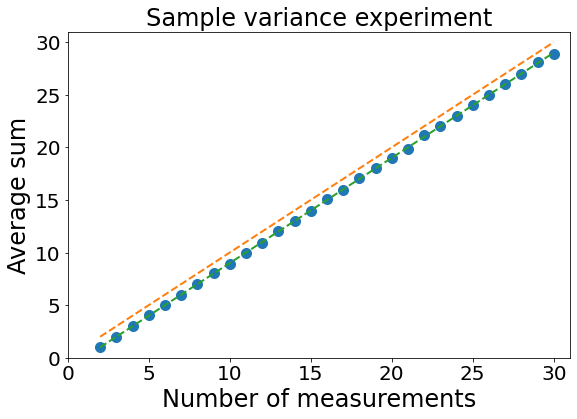

In [42]:
# Plot average sum vs number of measurements

plt.figure(figsize=(9, 6))

plt.plot(n_tab,dr2_tab,'o',markersize=10)
plt.xlabel('Number of measurements',size=24)
plt.ylabel('Average sum',size=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([0.,Nmax+1])
plt.ylim([0.,Nmax+1])      
plt.title("Sample variance experiment",size=24)

plt.plot(n_tab,n_tab,'--',linewidth=2)
plt.plot(n_tab,n_tab-1,'--',linewidth=2)

fname = '04_sample_variance.png'
plt.savefig(fname)

plt.show()

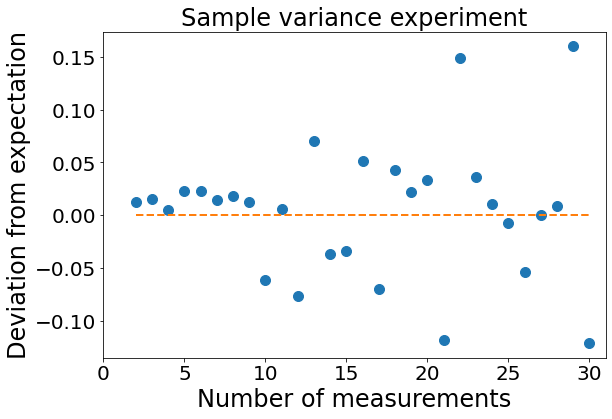

In [37]:
# Difference between result and expected dependence

dif_tab = dr2_tab - (n_tab - 1)

# Create second plot canvas

plt.figure(figsize=(9, 6))

plt.plot(n_tab,dif_tab,'o',markersize=10)
plt.xlabel('Number of measurements',size=24)
plt.ylabel('Deviation from expectation',size=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([0.,Nmax+1])
plt.title("Sample variance experiment",size=24)

plt.plot(n_tab,0.*n_tab,'--',linewidth=2)

fname = '04_sample_variance2.png'
plt.savefig(fname)

plt.show()